# **Assignment 02 MIN E 610**
Author: Harold Velasquez  
Professor: Yashar Pourrahimian, PhD, PEng  
**University of Alberta**  

## **Plot Cutoff vs tonnage and average grade**

Plot tonnage-grade curve with given inputs
Calculate Net Present Value for each given cut-off

In [56]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = ['serif']
rcParams['font.serif'] = ['Times New Roman']
rcParams['font.size'] = 12

In [57]:
cutoff = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7]             # %
tonnage_above_cutoff = [411,403,292,138,123,63,23,7] # Mt
grade = [0.3,0.31,0.36,0.5,0.52,0.59,0.69,0.78]      # %

selling_ore = 6614            # USD$/ton  
refining_cost = 1080          # USD$/ton 
recovery = 0.836              # %

mining_cost = 2               # USD$/ton
concentrator_cost = 5.49      # USD$/ton
fixed_cost_ore = 0.51         # USD$/ton

average_grade_deposit = 0.36  # %
interest_rate = 10            # %

cap_concentrator = 15         # Mt per year

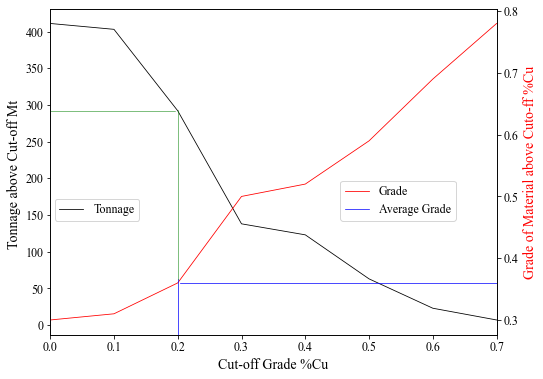

In [58]:
graph_name = 'tonnage_curve'
xlabel     = "Cut-off Grade %Cu"
ylabel_1   = "Tonnage above Cut-off Mt "
ylabel_2   = "Grade of Material above Cuto-ff %Cu"
title      = ''

fig,ax = plt.subplots(figsize=(8,6))
# make a plot
ax.plot(cutoff, tonnage_above_cutoff, lw=0.8, c='k', label='Tonnage')
# set x-axis label
ax.set_xlabel(xlabel,fontsize=14)
# set y-axis label
ax.set_ylabel(ylabel_1,fontsize=14)
ax.set_title(title)
ax.legend(loc=(0.01,0.35))

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(cutoff, grade, lw=0.8, c = 'r', label='Grade')
ax2.set_ylabel(ylabel_2,fontsize=14, c='r')

#Plot blue average grade line
ax2.axhline(y=average_grade_deposit, c='blue', lw='0.7', label='Average Grade', xmin=0.29)
ax2.axvline(x=0.2, c='blue', lw='0.7', ymax=0.17)

# Plot green segment line for tonnage
ax2.axhline(y=0.638, c='green', lw='0.5', xmax=0.28)
ax2.axvline(x=0.2, c='green', lw='0.5', ymin=0.17,ymax=0.69)

ax2.legend(loc=(0.65,0.35))

plt.xlim(0,max(cutoff))
plt.savefig (graph_name + '.png', bbox_inches = 'tight', dpi = 300)

## **Calculate NPV and mine life for each of the eight given cut-off grade**


### Calculate the Mine life for each of the given cutoff grade

In [59]:
#First with the mill capacity and each cutoff we calculate the LOM
LOM = []   # Life of Mine
for tonnage in tonnage_above_cutoff:
    lom_i = tonnage/cap_concentrator
    LOM.append(lom_i)

#Present the results for every cutoff
for i in range(len(LOM)):
    print('At cutoff', cutoff[i], ': The LOM is', round(LOM[i],2), 'years')

At cutoff 0 : The LOM is 27.4 years
At cutoff 0.1 : The LOM is 26.87 years
At cutoff 0.2 : The LOM is 19.47 years
At cutoff 0.3 : The LOM is 9.2 years
At cutoff 0.4 : The LOM is 8.2 years
At cutoff 0.5 : The LOM is 4.2 years
At cutoff 0.6 : The LOM is 1.53 years
At cutoff 0.7 : The LOM is 0.47 years


Using the foruma of Utility. Apply to the ore and summarize the results.  
 Utility(ore) = grade * recovery * (selling_ore-refining_cost) - (mining_cost + concentrator_cost + fixed_cost_ore)

In [60]:
# Create a list of list of productions for every cutoff grade
import math
prod_schedule = []

for life in LOM:
    prod_sched_at_cutoff = []

    # Add a list of 1's corresponding  to full year production
    for year in range(int(life)):
        size = cap_concentrator
        prod_sched_at_cutoff.append(size)

    #Add the fractional year part
    if life - int(life) != 0:

        fraction_production = (life-int(life)) * cap_concentrator
        prod_sched_at_cutoff.append(fraction_production)
        
    prod_schedule.append(prod_sched_at_cutoff)

### Calculate NPV for all given cut-off grades

In [61]:
# List of lists of Util. schedules for every cutoff grade, undiscounted
util_schedule = []
grade_iter = 0 # iterator for selecting a respective grade

for scenario in prod_schedule:
    util_sched_at_cutoff = []
    year = 0 # iterator for discounting factor

    for tonnage in scenario:
        disc_factor = ( (1 + (interest_rate*0.01)) ** year) ** (-1)
        
        # Some LOM's has fraction production on a last year. 
        # How to approach the Discount rate?
        year += 1

        # Consider average grade of deposit or grade at each cutoff?
        # It does not consider waste ( and SR) in formulation. Just ore
        utility = tonnage * grade[grade_iter] * (selling_ore - refining_cost) - (mining_cost + concentrator_cost + fixed_cost_ore) 
        utility = utility * disc_factor

        util_sched_at_cutoff.append(utility)

    grade_iter += 1

    # Also some production schedules has a lot of years
    util_schedule.append(util_sched_at_cutoff)

In [62]:
# Summarize the NPV results for every cutoff grade
npv_at_cutoff = []

for scenario in util_schedule:
    npv_at_cutoff.append(sum(scenario))
 
for i in range(len(npv_at_cutoff)):
    print('The NPV at COG ', cutoff[i], 'is', round(npv_at_cutoff[i],1), 'Millions USD$')

The NPV at COG  0 is 253715.9 Millions USD$
The NPV at COG  0.1 is 261103.5 Millions USD$
The NPV at COG  0.2 is 277176.6 Millions USD$
The NPV at COG  0.3 is 266397.5 Millions USD$
The NPV at COG  0.4 is 257288.2 Millions USD$
The NPV at COG  0.5 is 177428.6 Millions USD$
The NPV at COG  0.6 is 85032.2 Millions USD$
The NPV at COG  0.7 is 30207.6 Millions USD$


## **Plot Cut-off vs. NPV and mine life in the same graph**

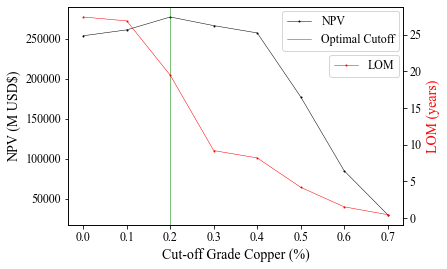

In [63]:
graph_name = 'Summarizing_Graph'
xlabel     = "Cut-off Grade Copper (%)"
ylabel_1   = "NPV (M USD$)"
ylabel_2   = "LOM (years)"
title      = ''

fig,ax = plt.subplots()
# make a plot
ax.plot(cutoff, npv_at_cutoff,'ko-', lw=0.5, markersize = 1, label='NPV')
# set x-axis label
ax.set_xlabel(xlabel,fontsize=14)
# set y-axis label
ax.set_ylabel(ylabel_1,fontsize=14)
ax.set_title(title)

# Vertical line for optimal cutoff grade
ax.axvline(x=0.2, c='g', lw='0.5', label='Optimal Cutoff')

ax.legend(loc = (0.64,0.8))

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(cutoff, LOM, 'ro-', lw=0.5, markersize = 1, label='LOM')
ax2.set_ylabel(ylabel_2,fontsize=14, c='r')
ax2.legend(loc = (0.78,0.68))

plt.savefig (graph_name + '.png', bbox_inches = 'tight', dpi = 300)

## **What is the optimal cutoff?**  
The optimal cutoff is at 0.2% of Copper. It is the point in which we reach the maximum Net Present Value. The graph also tell us the Life of Mine of our bussiness